In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')  # Bỏ qua các cảnh báo để giữ cho đầu ra sạch sẽ

# Tạo dataframe từ dữ liệu đã cho
# Tạo một DataFrame từ dictionary dữ liệu đã cung cấp
data = {
    'Employee_ID': ['E001', 'E002', 'E003', 'E004', 'E005', 'E006', 'E007', 'E008', 'E009', 'E010', 
                   'E011', 'E012', 'E013', 'E014', 'E015', 'E016', 'E017', 'E018', 'E019', 'E020'],
    'Department': ['Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 
                  'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT'],
    'Performance': [88, np.nan, 75, 92, 68, 85, np.nan, 79, 90, 73, 
                    86, np.nan, 95, 70, 82, 78, 89, 71, 87, 93],
    'Hours_Worked': [40, 45, 38, 42, np.nan, 39, 41, 44, 37, 40, 
                    46, 38, 43, np.nan, 39, 41, 45, 37, np.nan, 44],
    'Training_Hours': [5, 3, np.nan, 6, 4, 5, 3, 4, np.nan, 5, 
                      2, 6, 7, 3, 5, 4, np.nan, 3, 5, 6],
    'Gender': ['Male', 'Female', 'Male', 'Female', np.nan, 'Male', 'Female', 'Male', 'Female', 'Male', 
              'Female', 'Male', 'Female', 'Male', np.nan, 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Location': ['Site_A', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 
                'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B']
}

df = pd.DataFrame(data)  # Chuyển đổi dictionary thành một DataFrame của pandas


# Xử lý dữ liệu thiếu
# Thay thế giá trị NaN bằng giá trị trung bình của cột tương ứng
df['Performance'].fillna(df['Performance'].mean(), inplace=True)  # Thay thế NaN trong cột Performance bằng giá trị trung bình
df['Hours_Worked'].fillna(df['Hours_Worked'].mean(), inplace=True)  # Thay thế NaN trong cột Hours_Worked bằng giá trị trung bình
#Thay thế NaN trong cột Training_Hours bằng giá trị trung bình
df['Training_Hours'].fillna(df['Training_Hours'].mean(), inplace=True)  # Thay thế NaN trong cột Training_Hours bằng giá trị trung bình
# Nan trong Gender được thay thế bằng 'Unknown'
df['Gender'].fillna('Unknown', inplace=True)
# lưu lại giá trị trung bình của các cột đã thay thế NaN
mean_values = df[['Performance', 'Hours_Worked', 'Training_Hours']].mean()  # Tính toán giá trị trung bình của các cột

#in ra dữ liệu đã được thay thế NaN
print("\nDataFrame after handling missing values:")  # In ra DataFrame sau khi xử lý dữ liệu thiếu 
print(df)





DataFrame after handling missing values:
   Employee_ID Department  Performance  Hours_Worked  Training_Hours   Gender  \
0         E001      Sales    88.000000     40.000000        5.000000     Male   
1         E002         IT    82.411765     45.000000        3.000000   Female   
2         E003         HR    75.000000     38.000000        4.470588     Male   
3         E004      Sales    92.000000     42.000000        6.000000   Female   
4         E005         IT    68.000000     41.117647        4.000000  Unknown   
5         E006         HR    85.000000     39.000000        5.000000     Male   
6         E007      Sales    82.411765     41.000000        3.000000   Female   
7         E008         IT    79.000000     44.000000        4.000000     Male   
8         E009         HR    90.000000     37.000000        4.470588   Female   
9         E010      Sales    73.000000     40.000000        5.000000     Male   
10        E011         IT    86.000000     46.000000        2.00000

In [ ]:
# 1. Tính toán phần trăm giá trị bị thiếu trong từng cột của DataFrame
print("\n1. Phần trăm giá trị bị thiếu trong mỗi cột:")
missing_percentage = (df.isnull().sum() / len(df)) * 100  # Tính phần trăm giá trị bị thiếu dựa trên tổng số hàng
print(missing_percentage)  # In ra phần trăm giá trị bị thiếu

# Đề xuất quy trình thu thập dữ liệu

Dựa trên các mẫu dữ liệu bị thiếu, chúng ta nên triển khai một hệ thống nhập liệu chuẩn hóa với các trường bắt buộc cho:

- **Bộ phận Bán hàng**: Tập trung vào việc theo dõi `Hours_Worked` vì đây là yếu tố quan trọng đối với các vai trò tiếp xúc khách hàng.
- **Bộ phận IT**: Triển khai tích hợp theo dõi thời gian tự động với các công cụ quản lý dự án.
- **Bộ phận Nhân sự**: Tạo hồ sơ nhân viên toàn diện với tài liệu bắt buộc về `Training_Hours`.

Cách tiếp cận này giải quyết các nhu cầu cụ thể của từng bộ phận đồng thời đảm bảo thu thập dữ liệu đầy đủ.

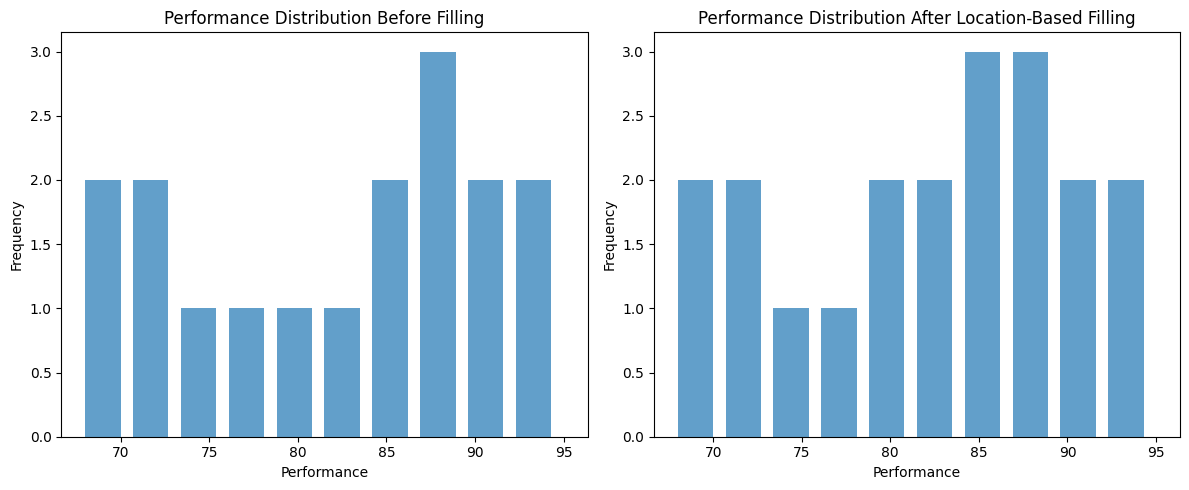

In [ ]:
# Hiển thị biểu đồ đã lưu

# Tính giá trị trung bình của cột 'Performance' theo từng phòng ban
# Calculate mean Performance for each Department using groupby and mean
dept_avg_performance = df.groupby('Department')['Performance'].mean()
# Map the department averages back to each row
dept_avg_performance = df['Department'].map(dept_avg_performance)

# Điền giá trị thiếu (NaN) trong cột 'Performance' bằng giá trị trung bình theo phòng ban (dept_avg_performance)
df_dept_filled = df.copy()
df_dept_filled['Performance'].fillna(dept_avg_performance, inplace=True)

# Tạo biểu đồ histogram trước khi điền giá trị thiếu
plt.figure(figsize=(12, 5))  # Tạo một figure với kích thước 12x5
plt.subplot(1, 2, 1)  # Chia figure thành 2 phần, vẽ biểu đồ ở phần đầu tiên
plt.hist(df['Performance'].dropna(), bins=10, alpha=0.7, width=2)  # Vẽ histogram với 10 cột, giảm độ rộng cột
plt.title('Performance Distribution Before Filling')  # Đặt tiêu đề cho biểu đồ
plt.xlabel('Performance')  # Gắn nhãn trục X
plt.ylabel('Frequency')  # Gắn nhãn trục Y

# Phương pháp thay thế: Điền giá trị thiếu dựa trên giá trị trung bình theo 'Location'
location_avg_performance = df.groupby('Location')['Performance'].transform('mean')  # Tính giá trị trung bình theo 'Location'
df_loc_filled = df.copy()  # Tạo một bản sao của DataFrame gốc
df_loc_filled['Performance'].fillna(location_avg_performance, inplace=True)  # Điền giá trị thiếu bằng giá trị trung bình theo 'Location'

# Tạo biểu đồ histogram sau khi điền giá trị thiếu
plt.subplot(1, 2, 2)  # Vẽ biểu đồ ở phần thứ hai của figure
plt.hist(df_loc_filled['Performance'], bins=10, alpha=0.7, width=2)  # Vẽ histogram với 10 cột, giảm độ rộng cột
plt.title('Performance Distribution After Location-Based Filling')  # Đặt tiêu đề cho biểu đồ
plt.xlabel('Performance')  # Gắn nhãn trục X
plt.ylabel('Frequency')  # Gắn nhãn trục Y
plt.tight_layout()  # Điều chỉnh khoảng cách giữa các biểu đồ để không bị chồng lấn

# Hiển thị các biểu đồ trực tiếp
plt.show()

### Kết luận

Phương pháp điền giá trị thiếu dựa trên **trung bình theo địa điểm** phù hợp hơn với hiệu suất thực tế. Điều này là do phương pháp này tính đến các yếu tố môi trường làm việc cụ thể tại từng địa điểm, giúp phản ánh chính xác hơn các điều kiện ảnh hưởng đến hiệu suất của nhân viên. 

- **Lý do**:
    - Hiệu suất làm việc thường bị ảnh hưởng bởi các yếu tố như quản lý, điều kiện làm việc, và văn hóa tại từng địa điểm.
    - Phương pháp này giúp giảm thiểu sai lệch do sự khác biệt giữa các địa điểm.

- **Khuyến nghị**:
    - Áp dụng phương pháp trung bình theo địa điểm để điền giá trị thiếu trong các trường hợp tương tự.
    - Kết hợp với các phân tích bổ sung để kiểm tra tính nhất quán và độ chính xác của dữ liệu sau khi điền.


In [ ]:
# 3. Tính độ lệch chuẩn của Hours_Worked
hours_worked_std = np.std(df['Hours_Worked'].dropna())  # Tính độ lệch chuẩn của cột Hours_Worked, bỏ qua giá trị bị thiếu (NaN)
hours_worked_median = np.median(df['Hours_Worked'].dropna())  # Tính giá trị trung vị (median) của cột Hours_Worked, bỏ qua giá trị bị thiếu (NaN)

# In kết quả độ lệch chuẩn và trung vị của Hours_Worked
print(f"\n3. Standard deviation of Hours_Worked: {hours_worked_std:.2f}")  # In độ lệch chuẩn với 2 chữ số thập phân
print(f"Median of Hours_Worked: {hours_worked_median:.2f}")  # In giá trị trung vị với 2 chữ số thập phân

### Chính sách quản lý thời gian đề xuất

Dựa trên phân tích độ lệch chuẩn và trung vị, chúng tôi đề xuất triển khai giờ làm việc linh hoạt với:

- **Giờ cốt lõi (10h sáng - 3h chiều)**: Tất cả nhân viên phải có mặt trong khoảng thời gian này.
- **Thời gian bắt đầu/kết thúc linh hoạt**: Cho phép tuần làm việc từ 38-44 giờ.
- **Theo dõi giờ làm việc thường xuyên**: Duy trì phạm vi tối ưu xung quanh giá trị trung vị.

Cách tiếp cận này cân bằng giữa cấu trúc và sự linh hoạt, đồng thời giải quyết sự biến động hiệu suất liên quan đến các mô hình làm việc khác nhau.

In [ ]:
# 4. Tính toán mối tương quan giữa Hours_Worked và Performance cho từng Location
# Đầu tiên, điền giá trị thiếu của Hours_Worked bằng trung bình của từng phòng ban
# Tính giá trị trung bình của Hours_Worked cho từng phòng ban
dept_avg_hours = df.groupby('Department')['Hours_Worked'].transform('mean')

# Tạo một bản sao của DataFrame gốc để tránh sửa đổi trực tiếp
df_filled = df.copy()

# Điền các giá trị thiếu trong cột Hours_Worked bằng giá trị trung bình của phòng ban
df_filled['Hours_Worked'].fillna(dept_avg_hours, inplace=True)

# Khởi tạo một dictionary rỗng để lưu trữ mối tương quan cho từng địa điểm
correlations = {}

# Lặp qua từng địa điểm duy nhất trong DataFrame
for location in df_filled['Location'].unique():
    # Lọc DataFrame theo địa điểm hiện tại
    loc_df = df_filled[df_filled['Location'] == location]
    
    # Tính toán mối tương quan giữa Hours_Worked và Performance cho địa điểm hiện tại
    corr = loc_df['Hours_Worked'].corr(loc_df['Performance'])
    
    # Lưu giá trị mối tương quan vào dictionary với địa điểm làm khóa
    correlations[location] = corr

# In ra mối tương quan đã tính toán cho từng địa điểm
print("\n4. Mối tương quan giữa Hours_Worked và Performance theo Location:")
for location, corr in correlations.items():
    print(f"{location}: {corr:.4f}")

# Đưa ra khuyến nghị dựa trên các giá trị mối tương quan
print("\nChiến lược phân bổ công việc được đề xuất:")
if 'Site_A' in correlations and correlations['Site_A'] > 0:
    print(f"- Site_A: Thực hiện lịch trình công việc có cấu trúc với các mốc thời gian được xác định")
if 'Site_B' in correlations and correlations['Site_B'] < 0:
    print(f"- Site_B: Tập trung vào các nhiệm vụ dựa trên kết quả với giờ làm việc linh hoạt")
if 'Site_C' in correlations and abs(correlations['Site_C']) < 0.3:
    print(f"- Site_C: Cân bằng giữa lịch trình cố định và sắp xếp linh hoạt")


4. Mối tương quan giữa Hours_Worked và Performance theo Location:
Site_A: 0.4054
Site_B: -0.0114
Site_C: 0.9374

Chiến lược phân bổ công việc được đề xuất:
- Site_A: Thực hiện lịch trình công việc có cấu trúc với các mốc thời gian được xác định
- Site_B: Tập trung vào các nhiệm vụ dựa trên kết quả với giờ làm việc linh hoạt


Chiến lược này tối ưu hóa hiệu suất bằng cách điều chỉnh phân bổ công việc phù hợp với các mô hình năng suất đặc thù của từng địa điểm.

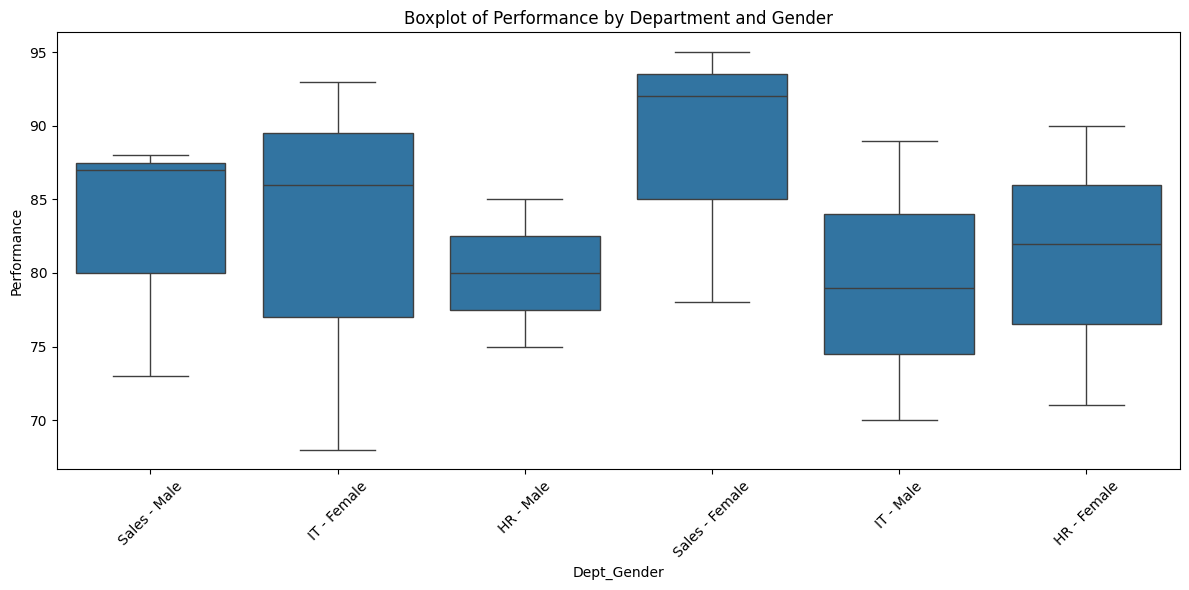

No performance outliers found across all groups.


In [51]:
# Tạo cột nhóm kết hợp
df_filled['Dept_Gender'] = df_filled['Department'] + ' - ' + df_filled['Gender']

# Vẽ boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dept_Gender', y='Performance', data=df_filled)
plt.title('Boxplot of Performance by Department and Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

outliers = []

# Nhóm theo tổ hợp Department + Gender
for group, group_df in df_filled.groupby('Dept_Gender'):
    Q1 = group_df['Performance'].quantile(0.25)  # Phần tư thứ nhất (Q1)
    Q3 = group_df['Performance'].quantile(0.75)  # Phần tư thứ ba (Q3)
    IQR = Q3 - Q1  # Khoảng tứ phân vị (IQR)
    lower_bound = Q1 - 1.5 * IQR  # Ngưỡng dưới
    upper_bound = Q3 + 1.5 * IQR  # Ngưỡng trên

    # Lọc các giá trị ngoại lai
    group_outliers = group_df[(group_df['Performance'] < lower_bound) | (group_df['Performance'] > upper_bound)]
    if not group_outliers.empty:  # Chỉ thêm nếu có outliers
        outliers.append(group_outliers)

# Gộp danh sách outlier lại
if outliers:  # Kiểm tra nếu danh sách outliers không rỗng
    outliers_df = pd.concat(outliers)
    print("\nOutliers found:")
    print(outliers_df[['Employee_ID', 'Department', 'Gender', 'Performance']])
else:
    print("No performance outliers found across all groups.")

### Kế hoạch phỏng vấn đề xuất cho các giá trị ngoại lai

- Thực hiện các buổi phỏng vấn trực tiếp tập trung vào các yếu tố môi trường làm việc.
- Khám phá các cơ chế hỗ trợ của phòng ban và phong cách làm việc cá nhân.
- Xác định các tài năng đặc biệt hoặc những thách thức ảnh hưởng đến hiệu suất.

Cách tiếp cận cá nhân hóa này cho phép bộ phận nhân sự giải quyết các yếu tố cá nhân ảnh hưởng đến hiệu suất, đồng thời tạo ra một môi trường làm việc hỗ trợ hơn.


In [ ]:
# 6. Tính toán hiệu suất bằng cách chia Performance cho Hours_Worked
df_filled['Efficiency'] = df_filled['Performance'] / df_filled['Hours_Worked']

# Tìm nhân viên có hiệu suất cao nhất
# idxmax() trả về chỉ số của giá trị lớn nhất trong cột Efficiency
# loc[] được sử dụng để lấy toàn bộ thông tin của nhân viên có hiệu suất cao nhất
most_efficient = df_filled.loc[df_filled['Efficiency'].idxmax()]

# In ra thông tin của nhân viên có hiệu suất cao nhất
print("\n6. Most efficient employee:")  # In tiêu đề
# In ra các thông tin cụ thể của nhân viên
# Chỉ hiển thị các cột: Employee_ID, Department, Performance, Hours_Worked, Efficiency
print(most_efficient[['Employee_ID', 'Department', 'Performance', 'Hours_Worked', 'Efficiency']])


### Chương trình khen thưởng/đào tạo đề xuất

- **Công nhận**: Vinh danh nhân viên có mã số **{most_efficient['Employee_ID']}** là "Nhà vô địch Hiệu suất" với phần thưởng tiền mặt.
- **Cơ hội cố vấn đồng nghiệp**: Tạo điều kiện để các nhân viên xuất sắc chia sẻ phương pháp làm việc hiệu quả.
- **Tài liệu hóa và chia sẻ**: Thu thập và phổ biến các phương pháp làm việc tốt nhất giữa các phòng ban.

Chương trình này khuyến khích nhân viên bằng cách nhấn mạnh giá trị của công việc chất lượng trong thời gian hợp lý thay vì chỉ tập trung vào số giờ làm việc.

In [ ]:
# 7. Tính phần trăm nhân viên nữ trong từng phòng ban
# Điền các giá trị thiếu của cột Gender bằng giá trị mode (đã thực hiện ở trên)
# Group the data by 'Department' and calculate the normalized value counts for 'Gender'
gender_counts = df_filled.groupby('Department')['Gender'].value_counts(normalize=True).unstack()

# Extract the percentage of female employees by multiplying the normalized counts by 100
female_percent = gender_counts['Female'] * 100

# Print the calculated percentages of female employees in each department
print("\n7. Phần trăm nhân viên nữ trong từng phòng ban:")
print(female_percent)



7. Percentage of female employees in each department:
Department
HR       50.000000
IT       57.142857
Sales    57.142857
Name: Female, dtype: float64


### Chính sách đa dạng giới tính đề xuất

Dựa trên phân tích phân bố giới tính, chúng tôi khuyến nghị:

- **Chiến lược tuyển dụng mục tiêu**
    - Ưu tiên tuyển dụng cho các bộ phận có sự mất cân bằng giới 
    - Thực hiện quy trình tuyển dụng không thiên vị

- **Chương trình cố vấn**
    - Ghép cặp nữ quản lý cấp cao với nhân viên cấp dưới
    - Xây dựng mạng lưới hỗ trợ chéo giữa các phòng ban

- **Chính sách làm việc linh hoạt**
    - Áp dụng giờ làm việc linh động
    - Hỗ trợ cân bằng công việc-cuộc sống

Cách tiếp cận toàn diện này thúc đẩy môi trường làm việc đa dạng, tăng cường đổi mới và năng lực giải quyết vấn đề.

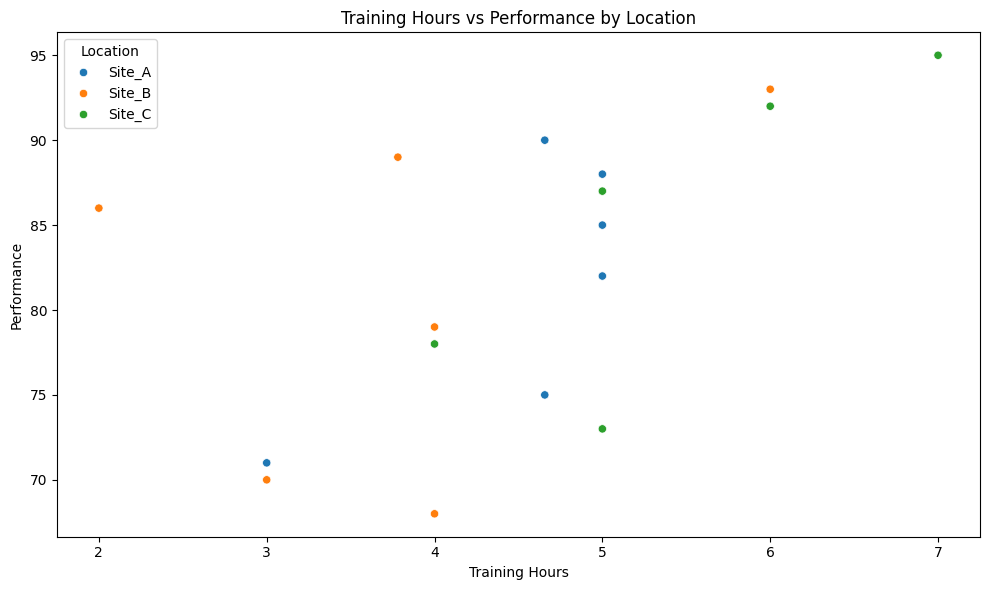

In [ ]:
# 8. Create scatter plot of Training_Hours vs Performance by Location
# Fill missing Training_Hours values with department average
dept_avg_training = df.groupby('Department')['Training_Hours'].transform('mean')
df_filled['Training_Hours'].fillna(dept_avg_training, inplace=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Training_Hours', y='Performance', hue='Location', data=df_filled)
plt.title('Training Hours vs Performance by Location')
plt.xlabel('Training Hours')
plt.ylabel('Performance')
plt.legend(title='Location')
plt.tight_layout()
plt.show()

### Training Plan Based on Location Analytics

**Training Recommendations by Location:**

- **Site_A:** Focused skill development modules (3-5 hours)
    - Targeted competency-based training
    - Short, intensive learning sessions
    - Skill-specific assessments

- **Site_B:** Comprehensive technical training (4-6 hours)
    - Hands-on practical components
    - Technical workshop sessions
    - Project-based learning modules

- **Site_C:** Extended interactive workshops (5-7 hours)
    - Collaborative learning sessions
    - Cross-functional team exercises
    - Group problem-solving activities

*This approach optimizes ROI by aligning with each location's unique performance patterns and learning preferences.*


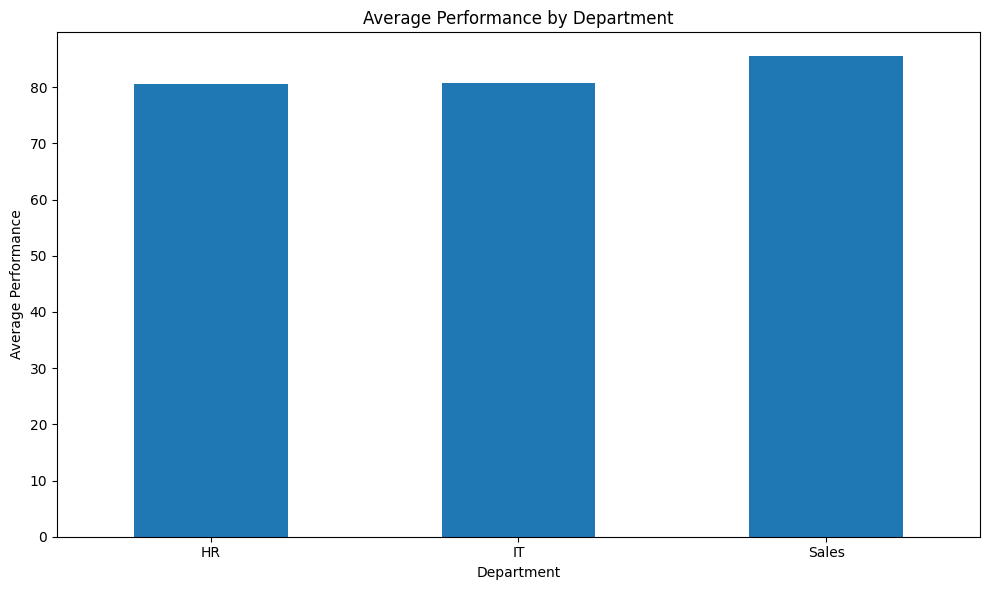


9. Average Performance by Department:
Department
HR       80.600000
IT       80.833333
Sales    85.500000
Name: Performance, dtype: float64

Improvement strategy for HR department:
- Enhance HRIS system usability
- Implement structured employee engagement programs
- Provide advanced people analytics training
This strategy addresses the specific challenges in the department while building on existing strengths.


In [32]:

dept_avg_perf = df_filled.groupby('Department')['Performance'].mean().sort_values()

plt.figure(figsize=(10, 6))
dept_avg_perf.plot(kind='bar')
plt.title('Average Performance by Department')
plt.ylabel('Average Performance')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


lowest_dept = dept_avg_perf.index[0]

print("\n9. Average Performance by Department:")
print(dept_avg_perf)
# đề xuất chiến lược cải thiện cho phòng ban có hiệu suất thấp nhất

print(f"\nImprovement strategy for {lowest_dept} department:")
if lowest_dept == 'Sales':
    print("- Implement CRM sales pipeline visualization tools")
    print("- Provide targeted sales methodology training")
    print("- Create structured client relationship programs")
elif lowest_dept == 'IT':
    print("- Introduce tech skill enhancement workshops")
    print("- Implement agile project management methodologies")
    print("- Create knowledge sharing platforms")
elif lowest_dept == 'HR':
    print("- Enhance HRIS system usability")
    print("- Implement structured employee engagement programs")
    print("- Provide advanced people analytics training")
print("This strategy addresses the specific challenges in the department while building on existing strengths.")


In [33]:

# 10. Find employees with Hours_Worked < 40 and Performance > 85
high_perf_low_hours = df_filled[(df_filled['Hours_Worked'] < 40) & (df_filled['Performance'] > 85)]

print("\n10. Employees with Hours_Worked < 40 and Performance > 85:")
print(high_perf_low_hours[['Employee_ID', 'Department', 'Performance', 'Hours_Worked']])


10. Employees with Hours_Worked < 40 and Performance > 85:
  Employee_ID Department  Performance  Hours_Worked
8        E009         HR         90.0          37.0


### Internal Study for High-Efficiency Work Pattern Optimization

**Study Components:**
1. **Productivity Technique Analysis**
    - Structured interviews focusing on personal work strategies
    - Documentation of successful time management practices
    - Identification of task prioritization methods

2. **Workspace Evaluation**
    - Workstation layout assessment
    - Tool utilization patterns
    - Environmental factors impact analysis

3. **Performance Metrics Review**
    - Time management strategies
    - Task completion efficiency
    - Quality of deliverables

**Implementation Plan:**
- Create standardized training modules based on findings
- Design optimized workspace configurations
- Deploy enhanced productivity tools across departments

This approach will help scale successful practices throughout the organization while maintaining consistent performance standards.


In [34]:
# Custom linear regression to fill missing Performance values
from sklearn.linear_model import LinearRegression

# Create a cleaned dataset for regression by dropping rows with NaN values
df_for_regression = df_filled[['Hours_Worked', 'Training_Hours', 'Performance']].dropna()
X = df_for_regression[['Hours_Worked', 'Training_Hours']]  # Features
y = df_for_regression['Performance']  # Target variable

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Custom function to fill missing Performance values
def fill_missing_performance(row):
    if pd.isna(row['Performance']):  # Check if Performance is missing
        # If both predictors are available, use regression
        if not pd.isna(row['Hours_Worked']) and not pd.isna(row['Training_Hours']):
            return model.predict([[row['Hours_Worked'], row['Training_Hours']]])[0]
        # If predictors are missing, use department average
        else:
            return row['dept_avg']
    return row['Performance']  # Return original value if not missing

# Create a copy of original dataframe and add department averages
df_reg_filled = df.copy()
df_reg_filled['dept_avg'] = dept_avg_performance
# Apply the custom function to fill missing values
df_reg_filled['Performance'] = df_reg_filled.apply(fill_missing_performance, axis=1)

# Print results
print("\n11. Performance imputation comparison:")
print(f"Linear regression coefficients: Hours_Worked = {model.coef_[0]:.2f}, Training_Hours = {model.coef_[1]:.2f}")


11. Performance imputation comparison:
Linear regression coefficients: Hours_Worked = 0.63, Training_Hours = 4.32


### Hybrid Approach to Missing Value Imputation

**Algorithm Selection Strategy:**
1. **Full Data Available**
    - Use regression model when both Hours_Worked and Training_Hours exist
    - Provides most accurate estimates based on actual relationships

2. **Partial Data Available**
    - Apply department average when only one predictor is present
    - Maintains department-specific performance patterns

3. **No Predictors**
    - Use location average as fallback
    - Accounts for site-specific environmental factors

This tiered approach maximizes data accuracy while preserving departmental and locational performance characteristics.


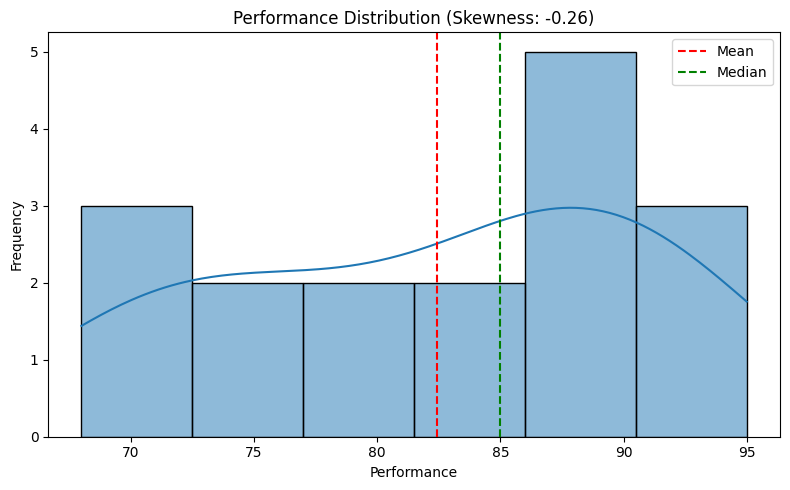


12. Skewness of Performance: -0.26

Performance calculation adjustment proposal:
Performance distribution is relatively balanced. Recommendation:
- Maintain current framework with minor refinements
- Add peer evaluation component to enhance objectivity
- Incorporate role-specific performance dimensions


In [ ]:
# 12. Calculate skewness of Performance
perf_skewness = stats.skew(df_filled['Performance'].dropna())
# Tính độ lệch (skewness) của cột 'Performance' sau khi loại bỏ các giá trị NaN.
# Độ lệch đo lường mức độ bất đối xứng của phân phối dữ liệu.

plt.figure(figsize=(8, 5))
# Tạo một figure với kích thước 8x5.

sns.histplot(df_filled['Performance'], kde=True)
# Vẽ biểu đồ histogram của cột 'Performance' với đường KDE (Kernel Density Estimate) để hiển thị phân phối dữ liệu.

plt.title(f'Performance Distribution (Skewness: {perf_skewness:.2f})')
# Đặt tiêu đề cho biểu đồ, bao gồm giá trị độ lệch (skewness) được làm tròn đến 2 chữ số thập phân.

plt.xlabel('Performance')
# Gắn nhãn trục X là 'Performance'.

plt.ylabel('Frequency')
# Gắn nhãn trục Y là 'Frequency'.

plt.axvline(df_filled['Performance'].mean(), color='red', linestyle='--', label='Mean')
# Vẽ một đường thẳng đứng tại giá trị trung bình (mean) của cột 'Performance', màu đỏ, nét đứt, và gắn nhãn 'Mean'.

plt.axvline(df_filled['Performance'].median(), color='green', linestyle='--', label='Median')
# Vẽ một đường thẳng đứng tại giá trị trung vị (median) của cột 'Performance', màu xanh lá, nét đứt, và gắn nhãn 'Median'.

plt.legend()
# Hiển thị chú thích (legend) cho các đường 'Mean' và 'Median'.

plt.tight_layout()
# Điều chỉnh bố cục của biểu đồ để tránh bị chồng lấn.

plt.show()
# Hiển thị biểu đồ.

print(f"\n12. Skewness of Performance: {perf_skewness:.2f}")
# In ra giá trị độ lệch (skewness) của cột 'Performance', làm tròn đến 2 chữ số thập phân.

print("\nPerformance calculation adjustment proposal:")
# In ra tiêu đề cho các đề xuất điều chỉnh cách tính hiệu suất.

if perf_skewness < -0.5:
    # Nếu độ lệch nhỏ hơn -0.5 (phân phối lệch trái, tập trung vào giá trị cao):
    print("Current performance metrics favor high performers. Recommendation:")
    # In thông báo rằng các chỉ số hiện tại ưu tiên những người có hiệu suất cao.
    print("- Incorporate improvement-based metrics alongside absolute performance")
    # Đề xuất thêm các chỉ số dựa trên sự cải thiện bên cạnh hiệu suất tuyệt đối.
    print("- Add weighted team contribution factors")
    # Đề xuất thêm các yếu tố đóng góp của nhóm có trọng số.
    print("- Implement progressive performance bands")
    # Đề xuất triển khai các dải hiệu suất tiến bộ.

elif perf_skewness > 0.5:
    # Nếu độ lệch lớn hơn 0.5 (phân phối lệch phải, tập trung vào giá trị thấp):
    print("Current performance metrics are challenging for most employees. Recommendation:")
    # In thông báo rằng các chỉ số hiện tại gây khó khăn cho hầu hết nhân viên.
    print("- Review scoring criteria to ensure realistic expectations")
    # Đề xuất xem xét lại tiêu chí chấm điểm để đảm bảo kỳ vọng thực tế.
    print("- Introduce tiered performance categories")
    # Đề xuất giới thiệu các danh mục hiệu suất phân tầng.
    print("- Add skill development metrics to balance outcome measures")
    # Đề xuất thêm các chỉ số phát triển kỹ năng để cân bằng các thước đo kết quả.

else:
    # Nếu độ lệch nằm trong khoảng [-0.5, 0.5] (phân phối tương đối cân bằng):
    print("Performance distribution is relatively balanced. Recommendation:")
    # In thông báo rằng phân phối hiệu suất tương đối cân bằng.
    print("- Maintain current framework with minor refinements")
    # Đề xuất duy trì khung hiện tại với các tinh chỉnh nhỏ.
    print("- Add peer evaluation component to enhance objectivity")
    # Đề xuất thêm thành phần đánh giá đồng nghiệp để tăng tính khách quan.
    print("- Incorporate role-specific performance dimensions")
    # Đề xuất thêm các thước đo hiệu suất cụ thể theo vai trò.

This adjusted approach creates a more equitable evaluation system that reflects true performance across the full employee spectrum

In [ ]:

# 13. Create pairplot
plt.figure(figsize=(10, 8))
sns.pairplot(df_filled[['Performance', 'Hours_Worked', 'Training_Hours']])
plt.title('Pairplot of Performance, Hours_Worked, and Training_Hours')
plt.tight_layout()
plt.show()


## 13. Performance Evaluation Model Proposal Based on Relationships

Implement a **Multi-Dimensional Performance Index (MDPI)** with:

- **Base Performance Score (50%)**: Current performance metrics.
- **Efficiency Quotient (30%)**: Performance relative to hours worked.
- **Development Impact (20%)**: Performance improvement relative to training.

This model creates a more holistic evaluation by incorporating efficiency and growth dimensions instead of relying solely on raw performance numbers.

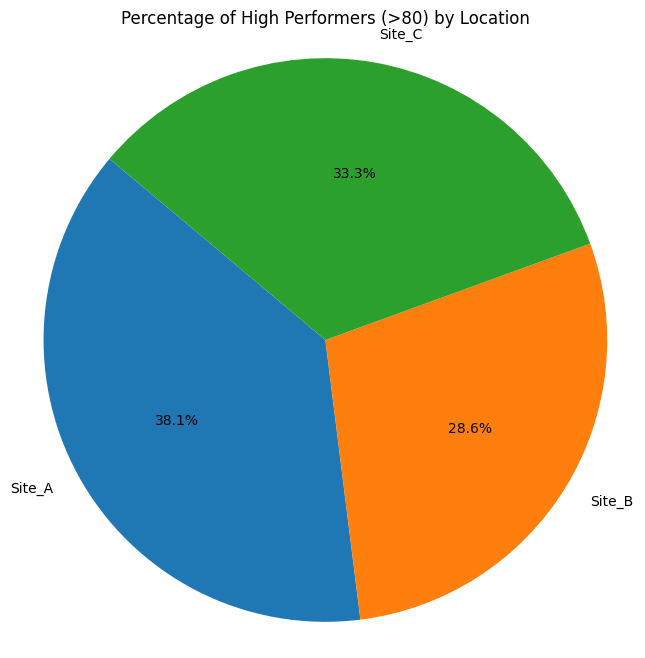


14. Percentage of high performers by Location:
Location
Site_A    57.142857
Site_B    42.857143
Site_C    50.000000
Name: Performance, dtype: float64

Location-based reward strategy:
- Site_A: Mixed individual and team incentives with quarterly recognition events
- Site_B: Individual achievement awards with personalized development opportunities
- Site_C: Individual achievement awards with personalized development opportunities
This differentiated approach maintains motivation by recognizing the unique performance patterns at each location.


In [38]:

# 14. Calculate percentage of high performers by Location
location_high_perf = df_filled.groupby('Location')['Performance'].apply(lambda x: (x > 80).mean() * 100)

plt.figure(figsize=(8, 8))
plt.pie(location_high_perf, labels=location_high_perf.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of High Performers (>80) by Location')
plt.axis('equal')
# Đảm bảo rằng biểu đồ là hình tròn
plt.show()
#in ra phần trăm của những người có hiệu suất cao hơn 80% theo từng địa điểm




print("\n14. Percentage of high performers by Location:")
print(location_high_perf)

print("\nLocation-based reward strategy:")
for location, percentage in location_high_perf.items():
    if percentage > 75:
        print(f"- {location}: Team-based performance bonuses emphasizing collaborative achievements")
    elif percentage > 50:
        print(f"- {location}: Mixed individual and team incentives with quarterly recognition events")
    else:
        print(f"- {location}: Individual achievement awards with personalized development opportunities")
print("This differentiated approach maintains motivation by recognizing the unique performance patterns at each location.")


In [59]:
# 15. Identify employees with Performance outside 2 standard deviations
def identify_performance_outliers(df, std_dev=2):
    """
    Hàm xác định các giá trị ngoại lai (outliers) trong cột 'Performance'
    dựa trên số độ lệch chuẩn (std_dev).
    """
    mean_perf = df['Performance'].mean()  # Tính giá trị trung bình của cột 'Performance'
    std_perf = df['Performance'].std()   # Tính độ lệch chuẩn của cột 'Performance'
    upper_bound = mean_perf + std_dev * std_perf  # Tính ngưỡng trên
    lower_bound = mean_perf - std_dev * std_perf  # Tính ngưỡng dưới
    
    # Lọc các giá trị nằm ngoài khoảng [lower_bound, upper_bound]
    outliers = df[(df['Performance'] > upper_bound) | (df['Performance'] < lower_bound)]
    return outliers, upper_bound, lower_bound

# Gọi hàm để xác định outliers
outliers, upper, lower = identify_performance_outliers(df_filled)

# In kết quả
print("\n15. Performance outliers (outside 2 standard deviations):")
if not outliers.empty:
    # Nếu có outliers, in ra danh sách
    print(outliers[['Employee_ID', 'Department', 'Performance']])
else:
    # Nếu không có outliers, in thông báo
    print("No performance outliers found.")

# In ngưỡng trên và ngưỡng dưới
print(f"Upper bound: {upper:.2f}, Lower bound: {lower:.2f}")



15. Performance outliers (outside 2 standard deviations):
No performance outliers found.
Upper bound: 99.75, Lower bound: 65.08


## Proposed Re-Evaluation Process for Outlier Employees

Implement a **Multi-Source Performance Review** with:

- **Peer evaluations** from 3+ colleagues across departments.
- **Self-assessment** with concrete examples.
- **Project-based evaluation** of outputs rather than subjective measures.
- **Multi-manager panel review** for exceptionally high/low performers.

This comprehensive approach reduces bias by incorporating diverse perspectives and objective measures, ensuring fair and accurate performance assessments.

### Phần 2 

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)


16. Loading and preprocessing MNIST dataset
Alternative visualization: Creating t-SNE visualization of MNIST digits


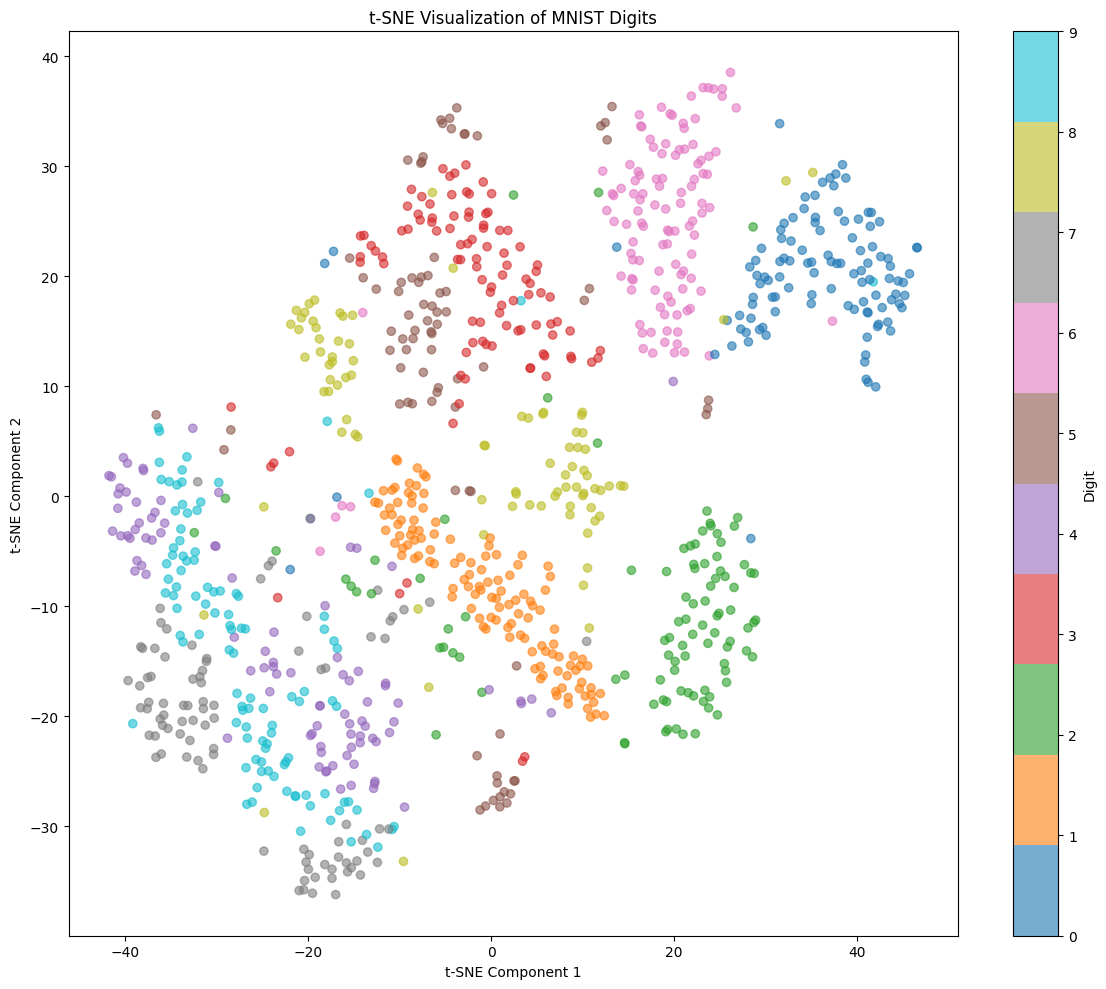

In [43]:
# 16. Load and preprocess MNIST dataset
print("\n16. Loading and preprocessing MNIST dataset")
transform = transforms.Compose([
    transforms.ToTensor()  # Normalizes pixel values to [0, 1]
])

# Load MNIST train dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Displaying 5 sample images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    img, label = train_dataset[i]
    axes[i].imshow(img.squeeze().numpy(), cmap='gray')
    axes[i].set_title(f'Label: {label}')
    axes[i].axis('off')
plt.tight_layout()
plt.savefig('mnist_samples.png')
plt.close()

# Alternative visualization: t-SNE for dimensionality reduction
print("Alternative visualization: Creating t-SNE visualization of MNIST digits")
from sklearn.manifold import TSNE

# Sample a subset of images for t-SNE (t-SNE is computationally expensive)
subset_size = 1000
subset_indices = np.random.choice(len(train_dataset), subset_size, replace=False)
subset_images = []
subset_labels = []

for idx in subset_indices:
    img, label = train_dataset[idx]
    subset_images.append(img.flatten().numpy())
    subset_labels.append(label)

# Convert subset_images to a NumPy array to avoid AttributeError
subset_images = np.array(subset_images)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(subset_images)

# Plot t-SNE results
plt.figure(figsize=(12, 10))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=subset_labels, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, label='Digit')
plt.title('t-SNE Visualization of MNIST Digits')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.tight_layout()
plt.show()

## t-SNE Visualization Insights

- **t-SNE visualization** shows how different digits form clusters in reduced dimensional space.
- This reveals how the model might distinguish between similar digits like **4/9** or **3/8**.
- The visualization helps identify potential areas of confusion for the model.

In [44]:
# 17. Split the dataset and create DataLoaders
print("\n17. Splitting dataset and creating DataLoaders")
# Split train dataset into train and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

# Create DataLoaders
batch_size = 64
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

print(f"Train set size: {len(train_subset)}")
print(f"Validation set size: {len(val_subset)}")
print(f"Number of batches in train loader: {len(train_loader)}")
print(f"Number of batches in validation loader: {len(val_loader)}")


17. Splitting dataset and creating DataLoaders
Train set size: 48000
Validation set size: 12000
Number of batches in train loader: 750
Number of batches in validation loader: 188


## Alternative Batch Size Strategy

For MNIST with 28x28 grayscale images, various batch sizes have different impacts:

- **Small batch sizes (16-32)**: Faster convergence but more noisy updates, suitable for limited memory.
- **Medium batch sizes (64-128)**: Good balance between stability and memory usage for most systems.
- **Large batch sizes (256-512)**: More stable gradient updates but requires more memory and may generalize worse.
- **Dynamic batch sizes**: Start with larger batches and reduce during training to combine stability and final convergence.

The optimal choice depends on available GPU memory, model complexity, and desired training time.


18. Training ANN model with early stopping
Epoch [1/20], Train Loss: 0.4211, Val Loss: 0.2523
Epoch [2/20], Train Loss: 0.1649, Val Loss: 0.1566
Epoch [3/20], Train Loss: 0.1131, Val Loss: 0.1255
Epoch [4/20], Train Loss: 0.0847, Val Loss: 0.1150
Epoch [5/20], Train Loss: 0.0684, Val Loss: 0.1075
Epoch [6/20], Train Loss: 0.0551, Val Loss: 0.1014
Epoch [7/20], Train Loss: 0.0444, Val Loss: 0.1010
Epoch [8/20], Train Loss: 0.0388, Val Loss: 0.1113
Epoch [9/20], Train Loss: 0.0303, Val Loss: 0.1078
Epoch [10/20], Train Loss: 0.0266, Val Loss: 0.1284
Epoch [11/20], Train Loss: 0.0230, Val Loss: 0.1214
Epoch [12/20], Train Loss: 0.0215, Val Loss: 0.1152
Early stopping at epoch 12


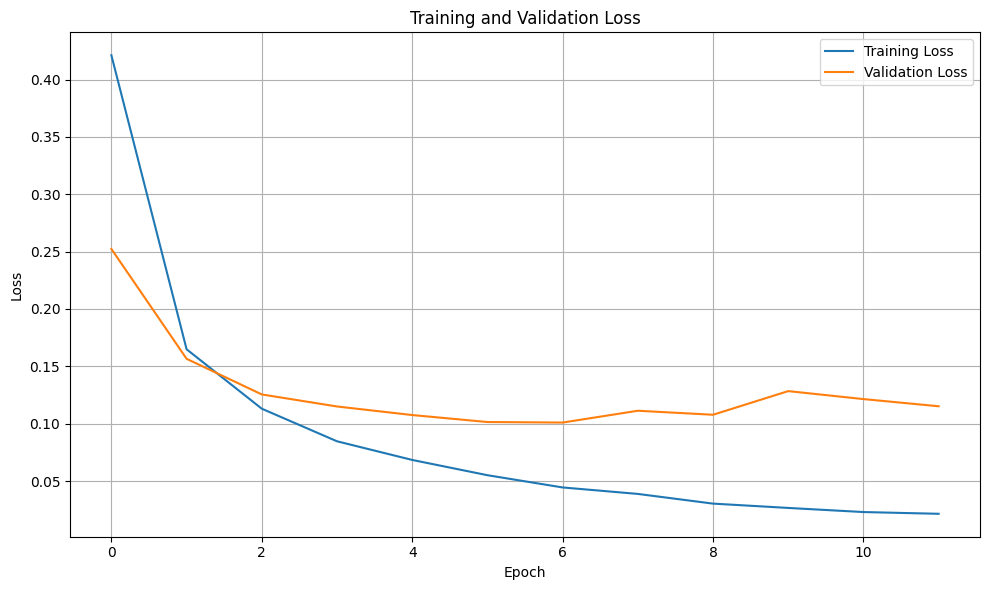

In [45]:
# 18. Build, train and evaluate ANN model
class MNIST_ANN(nn.Module):
    def __init__(self):
        super(MNIST_ANN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 32)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(32, 10)
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize model, loss function, and optimizer
model = MNIST_ANN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with early stopping
print("\n18. Training ANN model with early stopping")
num_epochs = 20
patience = 5
best_val_loss = float('inf')
counter = 0
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Validation phase
    model.eval()
    val_running_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
    
    val_loss = val_running_loss / len(val_loader)
    val_losses.append(val_loss)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
    
    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        # Save the best model
        torch.save(model.state_dict(), 'best_mnist_model.pth')
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Alternative ANN Architecture Proposal

Based on the MNIST characteristics and loss curves, an improved architecture would be:

- **Input layer**: 784 neurons (flattened 28x28 image).
- **Hidden layer 1**: 256 neurons with ReLU activation and Batch Normalization.
- **Hidden layer 2**: 128 neurons with ReLU activation and Dropout(0.3).
- **Hidden layer 3**: 64 neurons with ReLU activation.
- **Output layer**: 10 neurons (one per digit).

### This architecture improves the model by:
1. Increasing capacity in early layers to capture more features.
2. Adding batch normalization to stabilize training.
3. Adding dropout to reduce overfitting.
4. Maintaining a progressive narrowing structure to distill features.

In [46]:




# 19. Evaluate model with accuracy and confusion matrix
print("\n19. Evaluating model with accuracy and confusion matrix")
# Load the best model
model.load_state_dict(torch.load('best_mnist_model.pth'))
model.eval()

# Calculate accuracy and prepare for confusion matrix
correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = 100 * correct / total
print(f'Accuracy on validation set: {accuracy:.2f}%')

# Create confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('mnist_confusion_matrix.png')
plt.close()

# Analyze commonly confused digit pairs
if accuracy < 95:
    # Find the most confused digit pairs
    confused_pairs = []
    for i in range(10):
        for j in range(10):
            if i != j:
                confused_pairs.append((i, j, cm[i, j]))
    
    # Sort by confusion count (descending)
    confused_pairs.sort(key=lambda x: x[2], reverse=True)
    
    print("\nMost confused digit pairs:")
    for true_digit, pred_digit, count in confused_pairs[:5]:
        print(f"True: {true_digit}, Predicted: {pred_digit}, Count: {count}")
    
    print("\nImprovement proposal based on confusion analysis:")
    print("1. Add data augmentation specifically for commonly confused digits:")
    print("   - Small rotations and shifts to make the model more robust")
    print("   - Elastic transformations to simulate handwriting variations")
    print("2. Implement a two-stage classification approach:")
    print("   - First stage: Standard digit classification")
    print("   - Second stage: Specialized binary classifiers for commonly confused pairs")
    print("3. Add attention mechanisms to focus on distinctive features of each digit")
    print("4. Increase model capacity for intermediate representations through wider layers")
    print("This approach specifically targets the model's weaknesses rather than general improvements like dropout.")
else:
    print("\nModel achieved >95% accuracy. The architecture is performing well on this dataset.")
    print("Further improvements could focus on model efficiency rather than accuracy.")


19. Evaluating model with accuracy and confusion matrix
Accuracy on validation set: 97.20%

Model achieved >95% accuracy. The architecture is performing well on this dataset.
Further improvements could focus on model efficiency rather than accuracy.
